In [98]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

In [25]:
X,y = load_iris(return_X_y=True,as_frame=True )

In [26]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [27]:
y.isnull().sum()

0

There is no missing values in the dataset. 

## Tranining the model using KMeans Clustering

In [9]:
kmeans_kwargs = {"init":"random",
                 "n_init":50,
                 "max_iter":500,
                 "random_state":10}

In [40]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [41]:
kmeans = KMeans(n_clusters=5,**kmeans_kwargs)

In [43]:
kmeans.fit(X,y)
kmeans.inertia_

46.446182051282065

Plotting the Elbow Chart 

In [60]:
sse_score=[]
for k in range (1,12):
  kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(X,y)
  sse_score.append(kmeans.inertia_)

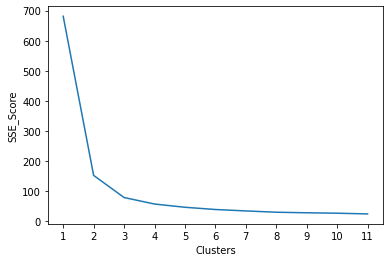

In [61]:
plt.plot(range(1,12),sse_score)
plt.xticks(range(1,12))
plt.xlabel('Clusters')
plt.ylabel('SSE_Score')
plt.show()

In [63]:
sse_score

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.29822966507178,
 30.01588095238096,
 28.14693893387315,
 26.72362757237603,
 24.374128327812535]

## Agglomerative Clustering

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
agg_kwargs = {'n_clusters':3, 
              'affinity':'euclidean',
              'linkage':'ward'}

In [88]:
agg = AgglomerativeClustering(**agg_kwargs)

In [91]:
agg.fit(X,y)
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [92]:
# no of leaves in the hierarchical tree
agg.n_leaves_

150